In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge,Lasso
import joblib
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import os


In [3]:
import sklearn
print(sklearn.__version__)


1.5.1


In [4]:
df=pd.read_csv('/Users/kechok/Documents/velib_project/etl/data/transformed_data/transformed_data.csv')

In [5]:
df.head()

,stationcode,name,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,nom_arrondissement_communes,code_insee_commune,longitude,latitude,date,year,month,day,time
0,21702,Gare SNCF Vanves-Malakoff,True,51.0,43,8,3,5,True,True,Vanves,NaN,2.292150,48.819002,2024-06-16,2024,6,16,17:51:14
1,15043,Brancion - Lefebvre,True,11.0,8,1,0,1,True,True,Paris,NaN,2.301431,48.829002,2024-06-16,2024,6,16,17:52:44
2,10012,Vinaigriers - Magenta,True,25.0,8,17,16,1,True,True,Paris,NaN,2.359305,48.873117,2024-06-16,2024,6,16,17:55:44
3,8001,Petit Palais,True,46.0,43,2,1,1,True,True,Paris,NaN,2.315765,48.866769,2024-06-16,2024,6,16,17:50:31
4,16101,Malakoff - Place de la Porte Maillot,True,31.0,24,7,6,1,True,True,Paris,NaN,2.283458,48.876733,2024-06-16,2024,6,16,17:50:40


In [6]:
df_final=df.copy()

In [7]:
df_final=df_final.drop('code_insee_commune',axis=1)

In [8]:
df_final.describe()

,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,longitude,latitude,year,month,day
count,38160.000000,38200.000000,38200.000000,38200.000000,38200.000000,38160.000000,38160.000000,38200.000000,38200.000000,38200.000000
mean,31.044471,18.885105,11.248639,7.255052,3.993586,2.340447,48.858741,2023.980262,6.010079,14.683796
std,12.850469,12.903479,11.090382,9.430907,4.182809,0.057007,0.031028,0.271567,0.498883,1.934147
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.165597,48.764615,2018.000000,1.000000,1.000000
25%,22.000000,10.000000,3.000000,1.000000,1.000000,2.302257,48.837702,2024.000000,6.000000,14.000000
50%,29.000000,18.000000,8.000000,3.000000,3.000000,2.342654,48.858880,2024.000000,6.000000,14.000000
75%,37.000000,26.000000,16.000000,11.000000,5.000000,2.377885,48.879543,2024.000000,6.000000,16.000000
max,200.000000,200.000000,82.000000,68.000000,57.000000,2.538242,48.957568,2024.000000,12.000000,31.000000


In [9]:
df_final.isnull().sum()

stationcode                     0
name                           40
is_installed                    0
capacity                       40
numdocksavailable               0
numbikesavailable               0
mechanical                      0
ebike                           0
is_renting                      0
is_returning                    0
nom_arrondissement_communes    40
longitude                      40
latitude                       40
date                            0
year                            0
month                           0
day                             0
time                            0
dtype: int64

In [10]:
df_final.dropna(inplace=True)

In [11]:
df_final.isnull().sum()

stationcode                    0
name                           0
is_installed                   0
capacity                       0
numdocksavailable              0
numbikesavailable              0
mechanical                     0
ebike                          0
is_renting                     0
is_returning                   0
nom_arrondissement_communes    0
longitude                      0
latitude                       0
date                           0
year                           0
month                          0
day                            0
time                           0
dtype: int64

In [13]:
df_final['stationcode']=df_final['stationcode'].astype('string')
df_final['name']=df_final['name'].astype('string')
df_final['nom_arrondissement_communes']=df_final['nom_arrondissement_communes'].astype('string')
df_final['time'] = pd.to_datetime(df_final['time'], format='%H:%M:%S').dt.time


In [14]:
def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

df_final['time_seconds'] = df_final['time'].apply(time_to_seconds)

In [15]:
stations_to_drop = ['10001_relais', '11031_relais']

# Drop rows where stationcode is in stations_to_drop
df_final = df_final[~df_final['stationcode'].isin(stations_to_drop)]

In [16]:
search = df_final[df_final['stationcode'] == '10001_relais']
print(len(search))

0


In [17]:
print(type(df_final.loc[0, 'time']))

<class 'datetime.time'>


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38108 entries, 0 to 38199
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stationcode                  38108 non-null  string 
 1   name                         38108 non-null  string 
 2   is_installed                 38108 non-null  bool   
 3   capacity                     38108 non-null  float64
 4   numdocksavailable            38108 non-null  int64  
 5   numbikesavailable            38108 non-null  int64  
 6   mechanical                   38108 non-null  int64  
 7   ebike                        38108 non-null  int64  
 8   is_renting                   38108 non-null  bool   
 9   is_returning                 38108 non-null  bool   
 10  nom_arrondissement_communes  38108 non-null  string 
 11  longitude                    38108 non-null  float64
 12  latitude                     38108 non-null  float64
 13  date                 

In [19]:
df_final.head()

,stationcode,name,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,nom_arrondissement_communes,longitude,latitude,date,year,month,day,time,time_seconds
0,21702,Gare SNCF Vanves-Malakoff,True,51.0,43,8,3,5,True,True,Vanves,2.292150,48.819002,2024-06-16,2024,6,16,17:51:14,64274
1,15043,Brancion - Lefebvre,True,11.0,8,1,0,1,True,True,Paris,2.301431,48.829002,2024-06-16,2024,6,16,17:52:44,64364
2,10012,Vinaigriers - Magenta,True,25.0,8,17,16,1,True,True,Paris,2.359305,48.873117,2024-06-16,2024,6,16,17:55:44,64544
3,8001,Petit Palais,True,46.0,43,2,1,1,True,True,Paris,2.315765,48.866769,2024-06-16,2024,6,16,17:50:31,64231
4,16101,Malakoff - Place de la Porte Maillot,True,31.0,24,7,6,1,True,True,Paris,2.283458,48.876733,2024-06-16,2024,6,16,17:50:40,64240


In [20]:
target_variable = 'numbikesavailable'
Y = df_final.loc[:, target_variable]

Correlation with target variable (numbikesavailable):
capacity             0.427448
numdocksavailable   -0.442258
numbikesavailable    1.000000
mechanical           0.929461
ebike                0.554594
longitude            0.056470
latitude            -0.088778
year                 0.070980
month               -0.012014
day                 -0.019498
time_seconds        -0.028022
dtype: float64


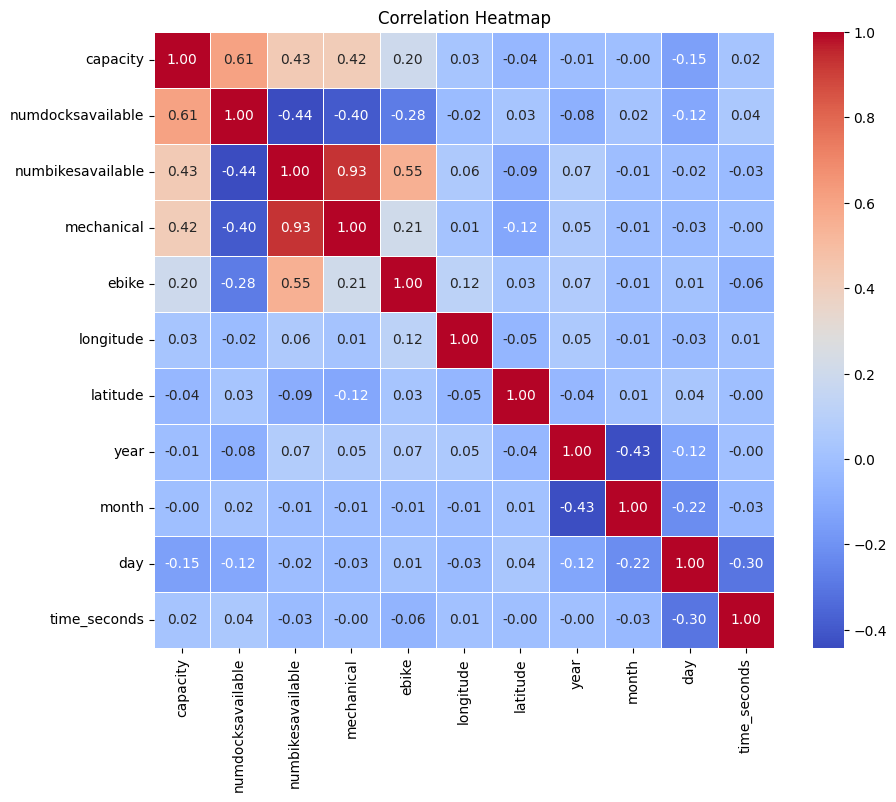

In [21]:
# Identify non-numeric columns
non_numeric_columns = df_final.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns if they are not relevant
df_numeric = df_final.drop(non_numeric_columns, axis=1)

# Compute correlations between numeric features and target variable
correlations = df_numeric.corrwith(Y)

# Print correlations
print("Correlation with target variable (numbikesavailable):")
print(correlations)


plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
### feature selection:
# Defining features, and features type (numerical/categorical)
features_list = ['year', 'month','day', 'time_seconds','numdocksavailable','mechanical','ebike']#,'mechanical','ebike', 'is_renting','numdocksavailable','name', 'is_installed']
numeric_indices = [3,4,5,6]
categorical_indices = [0,1,2]

# Creating several lists of features for our variable study (1 variable, then 2, then 3... then 5)
features_lists = [features_list[:i+1] for i in range(len(features_list))]

# Locate the X dataset in each subset
X_list = [df_final.loc[:, sublist] for sublist in features_lists]
print("Dataset with only 1 variable: ")
print(X_list[0])
print("")
print("Dataset with 10 variables :")
print(X_list[6])
print("")

# Numeric and categorical indices for each subset
numeric_indices_list = [[i for i in numeric_indices if i in range(len(sublist))] for sublist in features_lists]
categorical_indices_list = [[i for i in categorical_indices if i in range(len(sublist))] for sublist in features_lists]

for i,num,cat in zip(range(7),numeric_indices_list,categorical_indices_list):
    print("Subset with ", i, "variables: Numerical indices: ",num,"; Categorical indices: ",cat)

Dataset with only 1 variable: 
       year
0      2024
1      2024
2      2024
3      2024
4      2024
...     ...
38195  2024
38196  2024
38197  2024
38198  2024
38199  2024

[38108 rows x 1 columns]

Dataset with 10 variables :
       year  month  day  time_seconds  numdocksavailable  mechanical  ebike
0      2024      6   16         64274                 43           3      5
1      2024      6   16         64364                  8           0      1
2      2024      6   16         64544                  8          16      1
3      2024      6   16         64231                 43           1      1
4      2024      6   16         64240                 24           6      1
...     ...    ...  ...           ...                ...         ...    ...
38195  2024      6   14         53216                  8          14      2
38196  2024      6   14         53361                  7          17      3
38197  2024      6   14         53290                 26           0      0
38198  202

In [23]:
numeric_transformer = StandardScaler() # for numeric features
categorical_transformer = OneHotEncoder(drop="first") # for categorical features

In [24]:
#with ['year', 'month','day', 'time_seconds','stationcode','numdocksavailable','mechanical','ebike' ]
# # Initialize lists to store results
variables = []
r2_train_scores = []
r2_test_scores = []
rmse_train = []
rmse_test = []

feature_selection_results=[]

for X, numeric_indices, categorical_indices in zip(X_list, numeric_indices_list, categorical_indices_list):

    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

    
    feature_encoder = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_indices),
            ('num', numeric_transformer, numeric_indices)
        ]
    )
    X_train = feature_encoder.fit_transform(X_train)
    X_test = feature_encoder.transform(X_test)

    # Train the dataset and make predictions
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    test_r2 = r2_score(Y_test, Y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
    train_r2 = r2_score(Y_train, Y_train_pred)

    variables.append(len(numeric_indices) + len(categorical_indices))
    r2_train_scores.append(train_r2)
    r2_test_scores.append(test_r2)
    rmse_train.append(train_rmse)
    rmse_test.append(test_rmse)

    # Create a DataFrame with the results
    feature_selection_results_df = pd.DataFrame({
        'Variables': variables,
        'r2 Score (Train)': r2_train_scores,
        'r2 Score (Test)': r2_test_scores,
        'rmse train': rmse_train,
        'rmse test': rmse_test
    })

print(feature_selection_results_df)

   Variables  r2 Score (Train)  r2 Score (Test)  rmse train  rmse test
0          1          0.008624         0.009548   11.027633  11.163910
1          2          0.018757         0.018415   10.971130  11.113828
2          3          0.024972         0.019858   10.936328  11.105657
3          4          0.025041         0.019633   10.935941  11.106931
4          5          0.250176         0.232748    9.590533   9.825820
5          6          0.875484         0.877281    3.908190   3.929671
6          7          1.000000         1.000000    0.000029   0.000032


In [26]:
#with ['latitude', 'longitude', 'capacity', 'year', 'month','day', 'time_seconds','stationcode','numdocksavailable','mechanical' ] lat and lon have no impact on the score. So I took them out for my features
# # Initialize lists to store results
variables = []
r2_train_scores = []
r2_test_scores = []
rmse_train = []
rmse_test = []

feature_selection_results=[]

for X, numeric_indices, categorical_indices in zip(X_list, numeric_indices_list, categorical_indices_list):

    # Dividing the dataset in train and test (we use stratify as the target variable is not heavenly distributed)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

    # Applying pipeline on X variables depending on columns
    feature_encoder = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_indices),
            ('num', numeric_transformer, numeric_indices)
        ]
    )
    X_train = feature_encoder.fit_transform(X_train)
    X_test = feature_encoder.transform(X_test)

    # Train the dataset and make predictions
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    test_r2 = r2_score(Y_test, Y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
    train_r2 = r2_score(Y_train, Y_train_pred)

    variables.append(len(numeric_indices) + len(categorical_indices))
    r2_train_scores.append(train_r2)
    r2_test_scores.append(test_r2)
    rmse_train.append(train_rmse)
    rmse_test.append(test_rmse)

    # Create a DataFrame with the results
    feature_selection_results_df = pd.DataFrame({
        'Variables': variables,
        'r2 Score (Train)': r2_train_scores,
        'r2 Score (Test)': r2_test_scores,
        'rmse train': rmse_train,
        'rmse test': rmse_test
    })

print(feature_selection_results_df)

   Variables  r2 Score (Train)  r2 Score (Test)  rmse train  rmse test
0          1          0.008624         0.009548   11.027633  11.163910
1          2          0.018757         0.018415   10.971130  11.113828
2          3          0.024972         0.019858   10.936328  11.105657
3          4          0.025041         0.019633   10.935941  11.106931
4          5          0.250176         0.232748    9.590533   9.825820
5          6          0.875484         0.877281    3.908190   3.929671
6          7          1.000000         1.000000    0.000029   0.000032


In [28]:
features = ['year', 'month','day', 'time_seconds','stationcode','capacity']#,'numdocksavailable','mechanical','ebike','latitude', 'longitude'
target = 'numbikesavailable'


# Splitting the data into training and testing sets
X = df_final[features]
y = df_final[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the column transformer
numeric_features = ['time_seconds','capacity']
numeric_transformer = StandardScaler()

categorical_features = ['day', 'year', 'month','stationcode']
categorical_transformer = OneHotEncoder(handle_unknown='ignore',drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [29]:
models = [
    {
        'name': 'Linear Regression',
        'model': LinearRegression(),
        'params': {}
    },

    {
        'name': 'Ridge Regression',
        'model': Ridge(),
        'params': {
            'model__alpha': [40,80,100],
            'model__max_iter': [5000,10000]
        }
    },

    {
        'name': 'Lasso Regression',
        'model': Lasso(),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0],
            'model__max_iter': [1000, 2000, 5000]
        }
    },

    {
        'name': 'Decision Tree Regressor',
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth': [15, 20, 50, 100, 150],
            'model__min_samples_split': [10, 15, 20, 50, 100],
            'model__min_samples_leaf': [10, 15, 20, 40]
        }
    },
    {
        'name': 'Elastic Net Regression',
        'model': ElasticNet(),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0],
            'model__l1_ratio': [0.1, 0.5, 0.9],
            'model__max_iter': [1000, 2000, 5000]
        }
    },
    {
        'name': 'Random Forest Regressor',
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [200,300,500],
            'model__max_depth': [50,70,90]
        }
    },
    {
        'name': 'Gradient Boosting Regressor',
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [200,300,500],
            'model__learning_rate': [0.01, 0.03, 0.07,0.1],
            'model__max_depth': [7, 8 ,10]
        }
    },
    {
        'name': 'XGBoost Regressor',
        'model': XGBRegressor(random_state=42),
        'params': {
            'model__n_estimators': [200,300,500],
            'model__learning_rate': [0.01, 0.03, 0.07,0.1],
            'model__max_depth': [7, 8 ,10]
        }
    }
]





In [30]:
save_path = "/Users/kechok/Documents/velib_project/machine_learning/models"
os.makedirs(save_path, exist_ok=True)

In [31]:
results = []
best_params = {}

# Iterate over models
for model_info in models:
    model_name = model_info['name']
    model_type = model_info['model']
    model_params = model_info['params']
    
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_type)
    ])

    # Create GridSearchCV instance for the current model
    grid_search = GridSearchCV(pipeline, model_params, scoring='r2', cv=5)

    # Fit GridSearchCV to your training data
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best R² score for {model_name}: {grid_search.best_score_}")

    # Save best parameters in dictionary
    best_params[model_name] = grid_search.best_params_

    # Evaluate the best model on your test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - Test R²: {test_r2}")

    # Calculate training metrics
    y_train_pred = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"{model_name} - Training R²: {train_r2}")

    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
    cv_r2_scores = cv_scores



    results.append({
        "model": model_name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_pred),
        "Average CV RMSE": np.mean(cv_r2_scores),
        
    })
    # Save the best model using joblib
    model_filename = os.path.join(save_path, f"{model_name}_best_model.joblib")
    joblib.dump(best_model, model_filename)
    print(f"Saved {model_name} best model to {model_filename}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best parameters for Linear Regression: {}
Best R² score for Linear Regression: 0.6258222356552209
Linear Regression - Test R²: 0.6311914730608831
Linear Regression - Training R²: 0.6649744725270507


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Saved Linear Regression best model to /Users/kechok/Documents/velib_project/machine_learning/models/Linear Regression_best_model.joblib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categorie

Best parameters for Ridge Regression: {'model__alpha': 40, 'model__max_iter': 5000}
Best R² score for Ridge Regression: 0.41030078575625273
Ridge Regression - Test R²: 0.45057357222250216
Ridge Regression - Training R²: 0.45945089614053647
Saved Ridge Regression best model to /Users/kechok/Documents/velib_project/machine_learning/models/Ridge Regression_best_model.joblib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categorie

Best parameters for Lasso Regression: {'model__alpha': 0.1, 'model__max_iter': 1000}
Best R² score for Lasso Regression: 0.18214093170495765
Lasso Regression - Test R²: 0.19797959820526234
Lasso Regression - Training R²: 0.1828140769387936


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Saved Lasso Regression best model to /Users/kechok/Documents/velib_project/machine_learning/models/Lasso Regression_best_model.joblib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categorie

Best parameters for Decision Tree Regressor: {'model__max_depth': 150, 'model__min_samples_leaf': 10, 'model__min_samples_split': 100}
Best R² score for Decision Tree Regressor: 0.4492240075188215
Decision Tree Regressor - Test R²: 0.47866278678770136
Decision Tree Regressor - Training R²: 0.5818052656951312


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Saved Decision Tree Regressor best model to /Users/kechok/Documents/velib_project/machine_learning/models/Decision Tree Regressor_best_model.joblib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categorie

Best parameters for Elastic Net Regression: {'model__alpha': 0.1, 'model__l1_ratio': 0.1, 'model__max_iter': 1000}
Best R² score for Elastic Net Regression: 0.18366442620321605
Elastic Net Regression - Test R²: 0.19805433905041092
Elastic Net Regression - Training R²: 0.18441071766136552


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Saved Elastic Net Regression best model to /Users/kechok/Documents/velib_project/machine_learning/models/Elastic Net Regression_best_model.joblib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categorie

Best parameters for Random Forest Regressor: {'model__max_depth': 90, 'model__n_estimators': 500}
Best R² score for Random Forest Regressor: 0.7242742166135866


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest Regressor - Test R²: 0.7517719488275327
Random Forest Regressor - Training R²: 0.9219276918797716


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Saved Random Forest Regressor best model to /Users/kechok/Documents/velib_project/machine_learning/models/Random Forest Regressor_best_model.joblib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categorie

Best parameters for Gradient Boosting Regressor: {'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 500}
Best R² score for Gradient Boosting Regressor: 0.6617311470757322
Gradient Boosting Regressor - Test R²: 0.6852586183176306


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Gradient Boosting Regressor - Training R²: 0.7574945496157441


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Saved Gradient Boosting Regressor best model to /Users/kechok/Documents/velib_project/machine_learning/models/Gradient Boosting Regressor_best_model.joblib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categorie

Best parameters for XGBoost Regressor: {'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 500}
Best R² score for XGBoost Regressor: 0.634656035900116
XGBoost Regressor - Test R²: 0.6538873910903931
XGBoost Regressor - Training R²: 0.7243667840957642


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Saved XGBoost Regressor best model to /Users/kechok/Documents/velib_project/machine_learning/models/XGBoost Regressor_best_model.joblib


In [33]:
results_df=pd.DataFrame(results) # result with all dataset lines and test_split=0.2 excldue KNN
results_df

,model,Train R²,Test R²,Train MSE,Test MSE,Average CV RMSE
0,Linear Regression,0.664974,0.631191,40.940705,46.511425,0.629825
1,Ridge Regression,0.459451,0.450574,66.056046,69.289629,0.444043
2,Lasso Regression,0.182814,0.197980,99.861549,101.144927,0.184812
3,Decision Tree Regressor,0.581805,0.478663,51.104128,65.747223,0.541814
4,Elastic Net Regression,0.184411,0.198054,99.666436,101.135501,0.186359
5,Random Forest Regressor,0.921928,0.751772,9.540573,31.304700,0.760369
6,Gradient Boosting Regressor,0.757495,0.685259,29.634590,39.692873,0.676654
7,XGBoost Regressor,0.724367,0.653887,33.682861,43.649187,0.648653


In [35]:
results_df.sort_values(by=['Test R²'],ascending=False)

,model,Train R²,Test R²,Train MSE,Test MSE,Average CV RMSE
5,Random Forest Regressor,0.921928,0.751772,9.540573,31.304700,0.760369
6,Gradient Boosting Regressor,0.757495,0.685259,29.634590,39.692873,0.676654
7,XGBoost Regressor,0.724367,0.653887,33.682861,43.649187,0.648653
0,Linear Regression,0.664974,0.631191,40.940705,46.511425,0.629825
3,Decision Tree Regressor,0.581805,0.478663,51.104128,65.747223,0.541814
1,Ridge Regression,0.459451,0.450574,66.056046,69.289629,0.444043
4,Elastic Net Regression,0.184411,0.198054,99.666436,101.135501,0.186359
2,Lasso Regression,0.182814,0.197980,99.861549,101.144927,0.184812


In [36]:
models_regu = [
    {
        'name': 'Gradient Boosting Regressor Regu',
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [200, 300, 500],
            'model__learning_rate': [0.01, 0.03, 0.07, 0.1],
            'model__max_depth': [7, 8, 10],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__subsample': [0.8, 0.9, 1.0]
        }
    },
    {
        'name': 'XGBoost Regressor Regu',
        'model': XGBRegressor(random_state=42),
        'params': {
            'model__n_estimators': [200, 300, 500],
            'model__learning_rate': [0.01, 0.03, 0.07, 0.1],
            'model__max_depth': [7, 8, 10],
            'model__gamma': [0, 0.1, 0.3, 0.5],
            'model__reg_alpha': [0, 0.1, 0.5, 1],
            'model__reg_lambda': [0.1, 1, 5, 10]
        }
    }
]


In [37]:


# Iterate over models
for model_info in models_regu:
    model_name = model_info['name']
    model_type = model_info['model']
    model_params = model_info['params']
    
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_type)
    ])

    # Create GridSearchCV instance for the current model
    grid_search = GridSearchCV(pipeline, model_params, scoring='r2', cv=5)

    # Fit GridSearchCV to your training data
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best R² score for {model_name}: {grid_search.best_score_}")

    # Save best parameters in dictionary
    best_params[model_name] = grid_search.best_params_

    # Evaluate the best model on your test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - Test R²: {test_r2}")

    # Calculate training metrics
    y_train_pred = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"{model_name} - Training R²: {train_r2}")

    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
    cv_r2_scores = cv_scores



    results.append({
        "model": model_name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_pred),
        "Average CV RMSE": np.mean(cv_r2_scores),
        
    })
    # Save the best model using joblib
    model_filename = os.path.join(save_path, f"{model_name}_best_model.joblib")
    joblib.dump(best_model, model_filename)
    print(f"Saved {model_name} best model to {model_filename}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categorie